In [2]:
import pandas as pd
data = pd.read_excel('o2.xlsx')
data.head()

,Unnamed: 0,roz_aval,roz_dovom,roz_sevom,roz_4,roz_5,roz_6,Tempreture,Humid,Wind Speed,Wind Direction Sin,Wind Direction COS,Pressure,RainFall,roz_pihbini,PM10
0,0,40.363636,41.541667,43.416667,38.291667,23.681818,42.916667,20.8,52.875,1.000,-0.3420,9.396926e-01,1014.34,0.0,35.750000,95.166667
1,1,41.541667,43.416667,38.291667,23.681818,42.916667,35.750000,21.3,47.500,1.125,-0.5000,-8.660254e-01,1013.30,0.0,36.666667,76.208333
2,2,43.416667,38.291667,23.681818,42.916667,35.750000,36.666667,23.2,48.125,0.875,0.8660,5.000000e-01,1012.22,0.0,35.375000,87.833333
3,3,38.291667,23.681818,42.916667,35.750000,36.666667,35.375000,24.1,50.750,0.875,-0.9848,-1.736482e-01,1012.36,0.0,46.375000,73.166667
4,4,23.681818,42.916667,35.750000,36.666667,35.375000,46.375000,24.1,49.375,2.000,1.0000,6.123234e-17,1011.30,0.4,49.208333,106.000000


In [13]:
X = data[['roz_aval','roz_dovom','roz_sevom','roz_4','roz_5','roz_6','Humid','Wind Direction Sin','Wind Direction COS','Pressure','RainFall']]
X = X.values
Y = data['roz_pihbini']
Y = Y.values
from sklearn.preprocessing import StandardScaler
sc_X3 = StandardScaler()
sc_y3 = StandardScaler()
X3_3 = sc_X3.fit_transform(X)
Y = Y.reshape(-1,1)
Y3_3 = sc_y3.fit_transform(Y)
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=10)
X_sklearn = sklearn_pca.fit_transform(X3_3)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=0 ,test_size=0.25)

In [100]:
import keras
from keras.layers import Dense
from keras.models import Sequential
model = Sequential()
model.add(Dense(14, activation='relu', input_dim=11))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=2000,batch_size=len(x_train), verbose=0)
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 7ms/step - loss: 1678.6694


1678.66943359375

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
y_new_inverse3 = model.predict(x_test)
mse33 = mean_squared_error(y_test, y_new_inverse3)
mae33 = mean_absolute_error(y_test, y_new_inverse3)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 1389.501
rmse : 37.276
mae : 17.412


(10, 200)

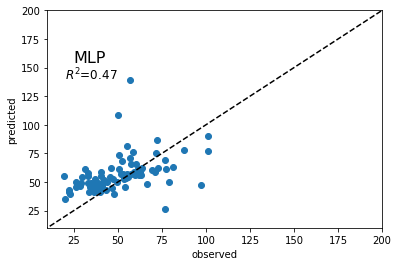

In [91]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_new_inverse3)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,155,'MLP',fontsize=16)
plt.text(20,140, r'$R^2$=%.2f'% (
       r2_score(y_test,y_new_inverse3)),fontsize=12)
plt.xlim([10, 200])
plt.ylim([10, 200])

In [62]:
model_json1 = model.to_json()
with open("MLP_PM25_with_AR_3.json", "w") as json_file:
    json_file.write(model_json1)
# serialize weights to HDF5
model.save_weights("MLP_PM25_with_AR_3.h5")
print("Saved model to disk")

Saved model to disk


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
regressor10 = RandomForestRegressor(n_estimators=59, random_state=0)
regressor10.fit(x_train, y_train)
y_new_inverse30 = regressor10.predict(x_test)
mse33 = mean_squared_error(y_test, y_new_inverse30)
mae33 = mean_absolute_error(y_test, y_new_inverse30)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 1500.230
rmse : 38.733
mae : 19.165


D:\phyton\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(10, 200)

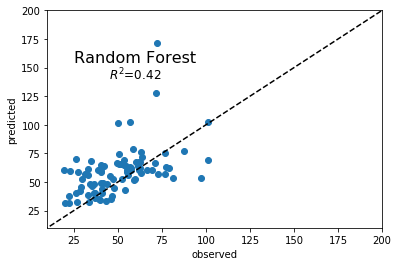

In [33]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_new_inverse30)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,155,'Random Forest',fontsize=16)
plt.text(45,140, r'$R^2$=%.2f'% (
       r2_score(y_test,y_new_inverse30)),fontsize=12)
plt.xlim([10, 200])
plt.ylim([10, 200])

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
sklinreg = LinearRegression()
sklinreg.fit(x_train, y_train)
y_ord_pred = sklinreg.predict(x_test)
mse33 = mean_squared_error(y_test, y_ord_pred)
mae33 = mean_absolute_error(y_test, y_ord_pred)
rmse33 = math.sqrt(mse33)
print('mse : %.3f'%mse33)
print('rmse : %.3f'%rmse33)
print('mae : %.3f'%mae33)

mse : 529.657
rmse : 23.014
mae : 15.967


(10, 200)

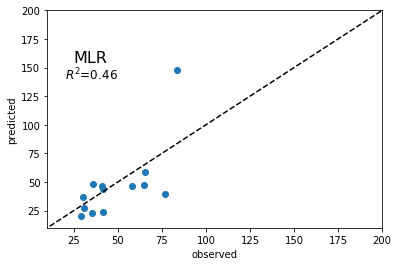

In [38]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score
plt.scatter(y_test,y_ord_pred)
plt.plot([0, 250], [0, 250], '--k')
plt.ylabel('predicted')
plt.xlabel('observed')
plt.text(25,155,'MLR',fontsize=16)
plt.text(20,140, r'$R^2$=%.2f'% (
       r2_score(y_ord_pred,y_test)),fontsize=12)
plt.xlim([10, 200])
plt.ylim([10, 200])